## Group Members: Yuxin (Annabel Du), Eva Slunjski, Samuel Rubidge, Xitaaz Rampersad

### Question 1 - Pick an asset universe that is representative of the broad multi-asset universe, includingdifferent asset classes and geographic regions. Get data since 2010, of at least monthly frequency, and calculate monthly returns. You do not need to go crazy - you should have at least 10 assets, but you don’t need to go off and get 50, although it will likely be easier to obtain and interpret more robust results if you have more assets

What each ticker stands for in our asset universe:

SP500: Standard & Poor’s 500 Index (the flagship US large-cap equity benchmark)

NDX: Nasdaq 100 Index (the 100 largest non-financial companies listed on Nasdaq)

DJI: Dow Jones Industrial Average (30 major US blue-chip stocks)

EWJ: iShares MSCI Japan ETF (tracks the MSCI Japan equity index)

EEM: iShares MSCI Emerging Markets ETF (tracks the MSCI Emerging Markets index)

EFA: iShares MSCI EAFE ETF (tracks the MSCI Europe, Australasia & Far East ex-US index)

GLD: SPDR Gold Shares (physically backed gold-holding ETF)

USO: United States Oil Fund LP (futures-based WTI crude oil fund)

IEF: iShares 7–10 Year Treasury ETF (US government bonds with 7–10 year maturities)

HYG: iShares iBoxx $ High Yield Corporate Bond ETF (US high-yield corporate bonds)

VNQ: Vanguard Real Estate ETF (US real estate investment trusts)

SPTSX: S&P/TSX Composite Index (Canada’s broad-market equity benchmark)

SXXP: STOXX Europe 600 Index (600 large, mid and small-cap companies across 17 European countries)

ASX: FTSE All-Share Index (the broad UK equity market index)

UUP: Invesco DB US Dollar Index Bullish Fund (tracks the ICE US Dollar Index)

FXE: Invesco CurrencyShares Euro Trust (tracks the euro against the US dollar)

In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import matplotlib.pyplot as plt


# Load the CSV file into a DataFrame
df = pd.read_csv('HW3_Macro_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

df.sort_values(by='Date', inplace=True, ascending=True)

df1 = df.drop(columns=['CPI', 'FDFD']).copy()



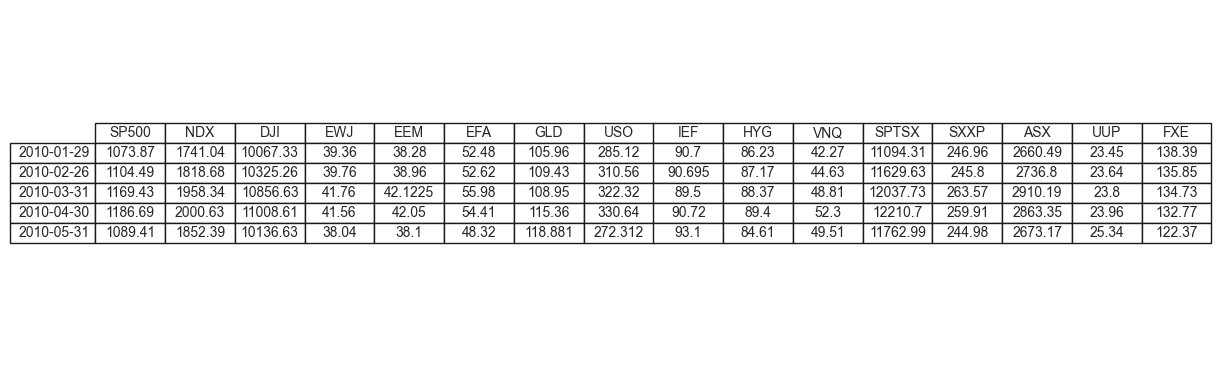

In [41]:
preview_df = df1.head()

# Plot table
fig, ax = plt.subplots(figsize=(12, 2 + 0.5 * len(preview_df)))  # Adjust height dynamically
ax.axis('off')
tbl = plt.table(cellText=preview_df.values,
                colLabels=preview_df.columns,
                rowLabels=preview_df.index.strftime('%Y-%m-%d'),
                loc='center',
                cellLoc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

## Question 2 - Standardize the asset price return data you are using such that doing analysis on thisuniverse will make sense and results will be comparable across assets. Normalizing by volatility (so you are looking at everything in standard deviation terms), is a reasonable approach.

               SP500       NDX       DJI       EWJ       EEM       EFA  \
Date                                                                     
2024-12-31 -0.687841  0.146943 -0.973845 -1.140561 -0.757860 -1.442473   
2025-01-31  0.728582  0.839651  0.812267  0.485132  0.826676  1.050142   
2025-02-28 -0.374771 -0.825741 -0.271083  0.085225  0.420108  0.742620   
2025-03-31 -1.649308 -1.772698 -0.938728  0.055985  0.462844  0.046695   
2025-04-30 -0.219627  0.331946 -0.795041  2.211319  0.166919  1.877052   

                 GLD       USO       IEF       HYG       VNQ     SPTSX  \
Date                                                                     
2024-12-31 -0.344297  1.009989 -1.182957 -1.084960 -1.514284 -0.877569   
2025-01-31  1.451744  0.976520  0.268556  0.826418  0.276986  0.786206   
2025-02-28  0.418064 -0.835342  1.103189  0.363124  0.584754 -0.127896   
2025-03-31  1.937420  0.718247  0.023645 -1.010948 -0.617317 -0.644289   
2025-04-30  1.709160 -1.811638  0.701

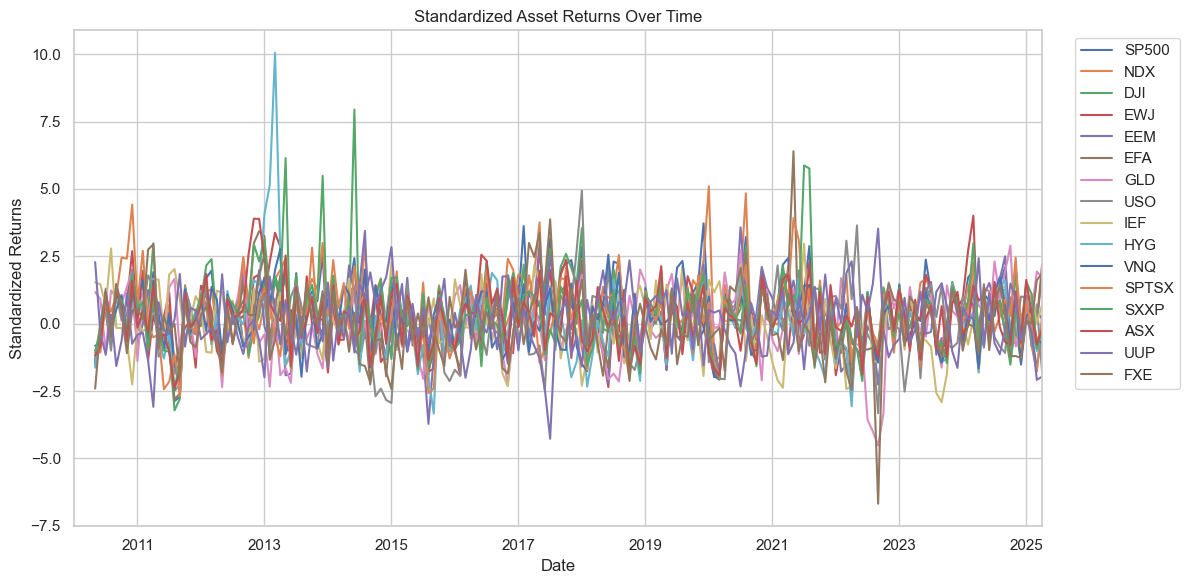

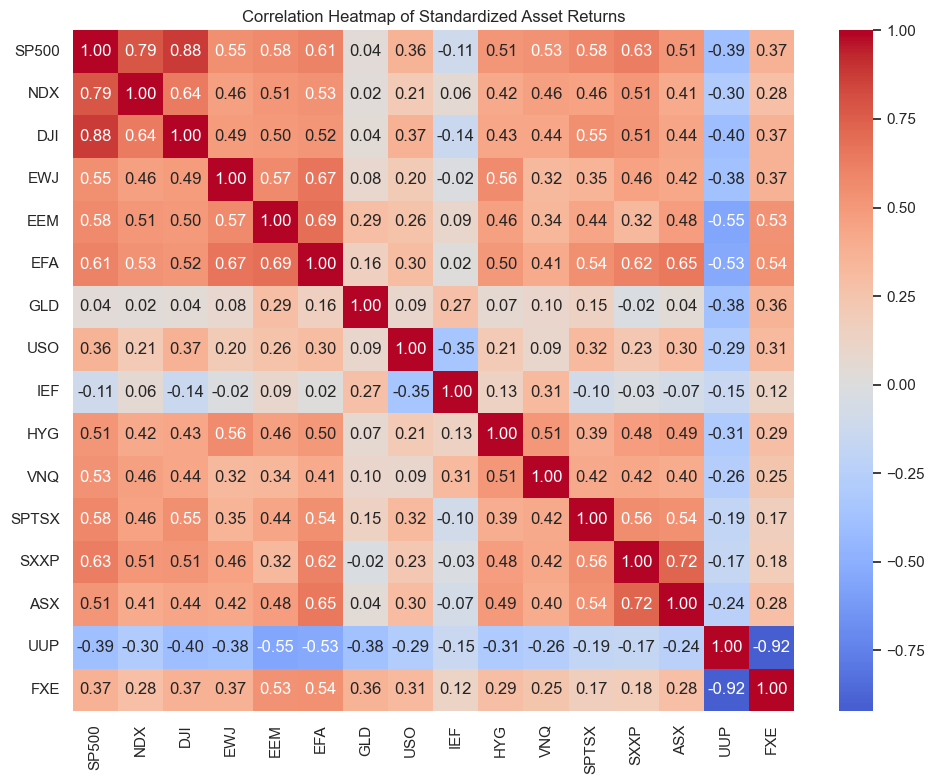

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# Load the uploaded CSV
standardized_returns = df.copy()


# Calculate percentage returns

returns = standardized_returns.pct_change()

# Standardize by 3-month rolling volatility (standard deviation)
standardized_returns = returns / returns.rolling(window=4).std()


standardized_returns = standardized_returns.drop(columns=['CPI', 'FDFD'])


print(standardized_returns.tail(5))

#PLOT 1

standardized_returns.plot(figsize=(12, 6), title="Standardized Asset Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Standardized Returns")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()



###PLOT 2


correlation_matrix = standardized_returns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Standardized Asset Returns")
plt.tight_layout()
plt.show()

## Question 3 - Pick 2-3 macro data series you think are relevant for the pricing of this universe. They should be available since 2010 and of monthly frequency. Why do you think these are relevant for the asset prices you have chosen?

We chose CPI (Consumer Price Index) and FDFD (Fed Funds Rate)

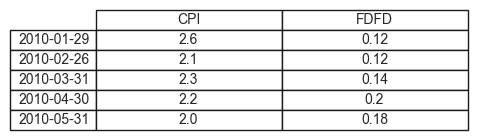

In [43]:
df2 = df.copy()
df2 = df2.drop(columns=[x for x in df2.columns if x not in ['CPI', 'FDFD']])

preview_df = df2.head()

# Plot table
fig, ax = plt.subplots(figsize=(4,1 ))  # Adjust height dynamically
ax.axis('off')
tbl = plt.table(cellText=preview_df.values,
                colLabels=preview_df.columns,
                rowLabels=preview_df.index.strftime('%Y-%m-%d'),
                loc='center',
                cellLoc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

## Question 4 - From 2010-2024, empirically verify if the macro data series are relevant for the asset price series. You can do this via linear regression, as discussed in class, or via some other method. Explain and justify your approach.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

df3 = df.copy()

# 1. Select features and scale them
scaler = StandardScaler()
X_raw = df3[['CPI', 'FDFD']]
X_scaled = scaler.fit_transform(X_raw)

results = []

# 2. Loop over each column as the dependent variable
for col in df3.columns:
    if col in ['CPI', 'FDFD']:
        continue  # skip the regressors themselves
    y = df3[col]
    
    # 3. Fit the model using scaled X
    model = LinearRegression()
    model.fit(X_scaled, y)

    # 4. Extract betas and R^2
    beta_cpi, beta_fdfd = model.coef_
    r2 = model.score(X_scaled, y)
    
    results.append({
        'variable': col,
        'beta_CPI':     beta_cpi,
        'beta_FDFD':    beta_fdfd,
        'R²':    r2
    })

# 5. Build and print the summary DataFrame
results_df = pd.DataFrame(results).set_index('variable')
print(results_df)


             beta_CPI    beta_FDFD        R²
variable                                    
SP500      400.043577   860.402565  0.621487
NDX       1640.593987  3488.516466  0.600921
DJI       2914.459963  6084.893378  0.629299
EWJ          1.756908     5.356460  0.378597
EEM          1.333752    -0.895900  0.084578
EFA          1.690908     4.268699  0.340560
GLD          8.139553    19.646953  0.401763
USO        -12.886155   -41.550591  0.219282
IEF         -0.114199    -3.989423  0.273360
HYG         -1.569457    -3.897426  0.640494
VNQ          5.111503     3.094471  0.229099
SPTSX     1258.359826  2197.630428  0.647553
SXXP        17.026718    49.899069  0.535164
ASX         95.103321   315.602444  0.489766
UUP          0.369997     1.729826  0.614771
FXE         -2.255335    -7.693924  0.395432


## Question 5 - Should your estimation sample period be different? Why or why not? If it should be different, adjust it and do your analysis on the altered sample.

We have altered our estimation sample period to feature a pre-COVID and post-COVID split to show how the markets have changed after the unprecedented event.

In [45]:
splits = {
    'PreCOVID' : ('2010-01-01','2020-03-11'),
    'PostCOVID': ('2020-03-11','2024-12-31')
}

all_results = []

for name, (start, end) in splits.items():
    d = df.loc[f'{start}':f'{end}'].copy()
    macros = d[['CPI','FDFD']]
    X = pd.DataFrame(scaler.transform(macros), index=macros.index, columns=macros.columns)

    for asset in d.columns.difference(['CPI','FDFD']):
        y = d[asset].dropna()
        Xi = X.loc[y.index]
        model = LinearRegression().fit(Xi, y)
        all_results.append({
            'TimePeriod': name,
            'Asset': asset,
            'β_CPI': model.coef_[0],
            'β_FedFunds': model.coef_[1],
            'R²': model.score(Xi, y)
        })

split_df = pd.DataFrame(all_results).set_index(['TimePeriod','Asset']).round(4)
print(split_df)




before = results_df["R²"].mean().round(4)
print("Before Average R²:")
print(before)


after = split_df["R²"].mean().round(4)
print("After Average R²:")
print(after)

                      β_CPI  β_FedFunds      R²
TimePeriod Asset                               
PreCOVID   ASX    -256.4655    760.5502  0.5179
           DJI   -2253.3199  10809.0247  0.7716
           EEM       3.5761      1.4285  0.2023
           EFA      -2.4101      7.2295  0.2579
           EWJ      -3.5508     12.7245  0.5833
           FXE      14.6611    -19.5270  0.5621
           GLD      22.2037    -10.7147  0.3022
           HYG       1.1929     -4.0358  0.2342
           IEF      -4.3935      3.8514  0.1778
           NDX    -871.6117   4037.9878  0.7772
           SP500  -336.8398   1192.9115  0.7160
           SPTSX  -569.5688   2682.7910  0.5236
           SXXP    -54.0425     82.3014  0.5303
           USO      87.2659   -158.5891  0.5535
           UUP      -1.7887      2.8123  0.5639
           VNQ     -11.0522     18.1402  0.4566
PostCOVID  ASX     124.6801    183.6257  0.5884
           DJI     664.0635   2160.1262  0.3980
           EEM      -0.2667     -2.4746 

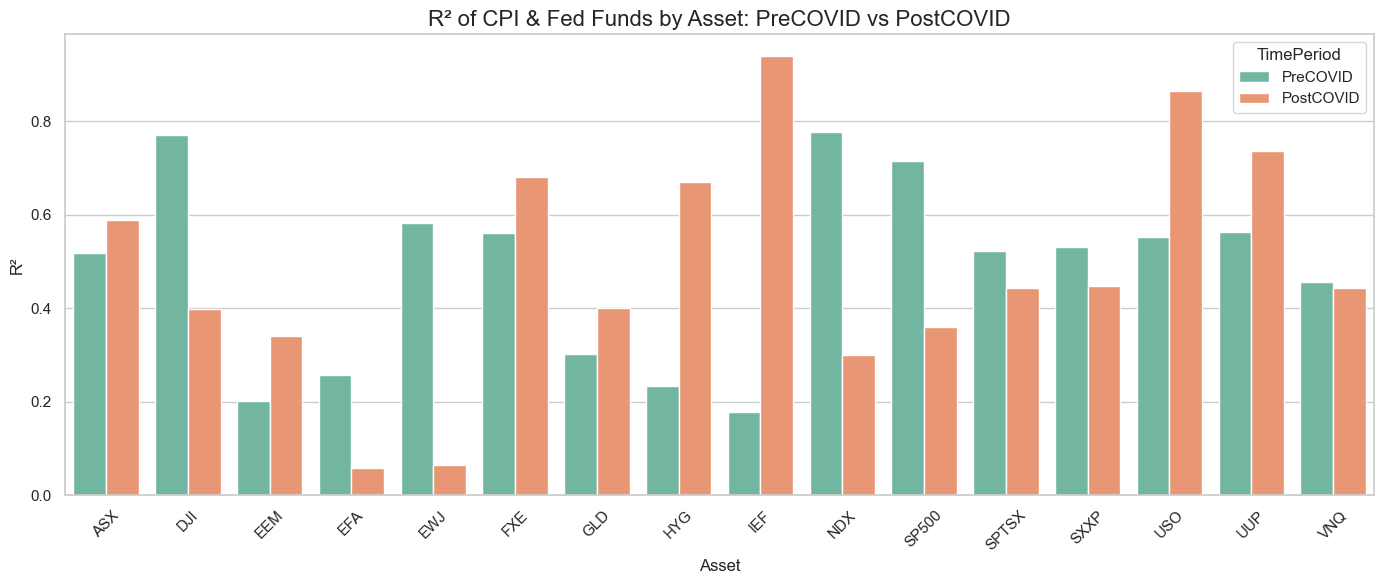

C:\Users\kramm\AppData\Local\Temp\ipykernel_3984\2133932820.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_df, x="Period", y="Average R²", palette="coolwarm")


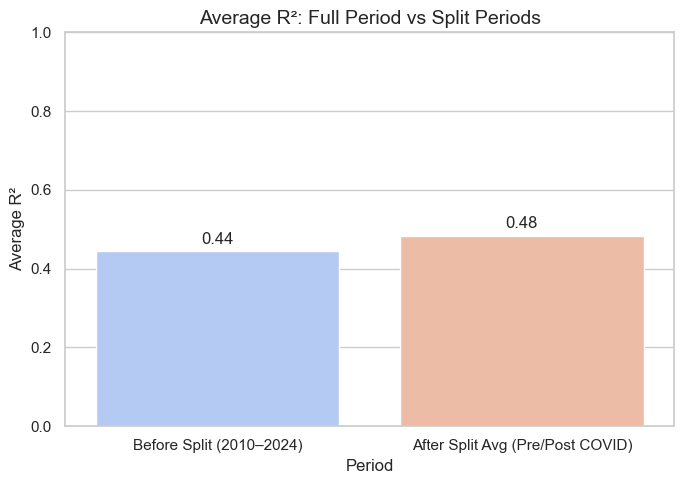

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming split_df and results_df already exist
# Reset index to plot easily
plot_df = split_df.reset_index()

# Set seaborn theme
sns.set(style="whitegrid")

# --- 1. Bar Plot of R² per Asset in each Time Period ---
plt.figure(figsize=(14, 6))
sns.barplot(data=plot_df, x="Asset", y="R²", hue="TimePeriod", palette="Set2")
plt.title("R² of CPI & Fed Funds by Asset: PreCOVID vs PostCOVID", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# --- 2. Average R² Comparison: Before vs After Split ---
before = results_df["R²"].mean().round(4)
after = split_df["R²"].mean().round(4)

# Create a comparison DataFrame
compare_df = pd.DataFrame({
    'Period': ['Before Split (2010–2024)', 'After Split Avg (Pre/Post COVID)'],
    'Average R²': [before, after]
})

# Plot comparison
plt.figure(figsize=(7, 5))
sns.barplot(data=compare_df, x="Period", y="Average R²", palette="coolwarm")
plt.title("Average R²: Full Period vs Split Periods", fontsize=14)
plt.ylim(0, 1)
for index, row in compare_df.iterrows():
    plt.text(index, row['Average R²'] + 0.02, f"{row['Average R²']:.2f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()


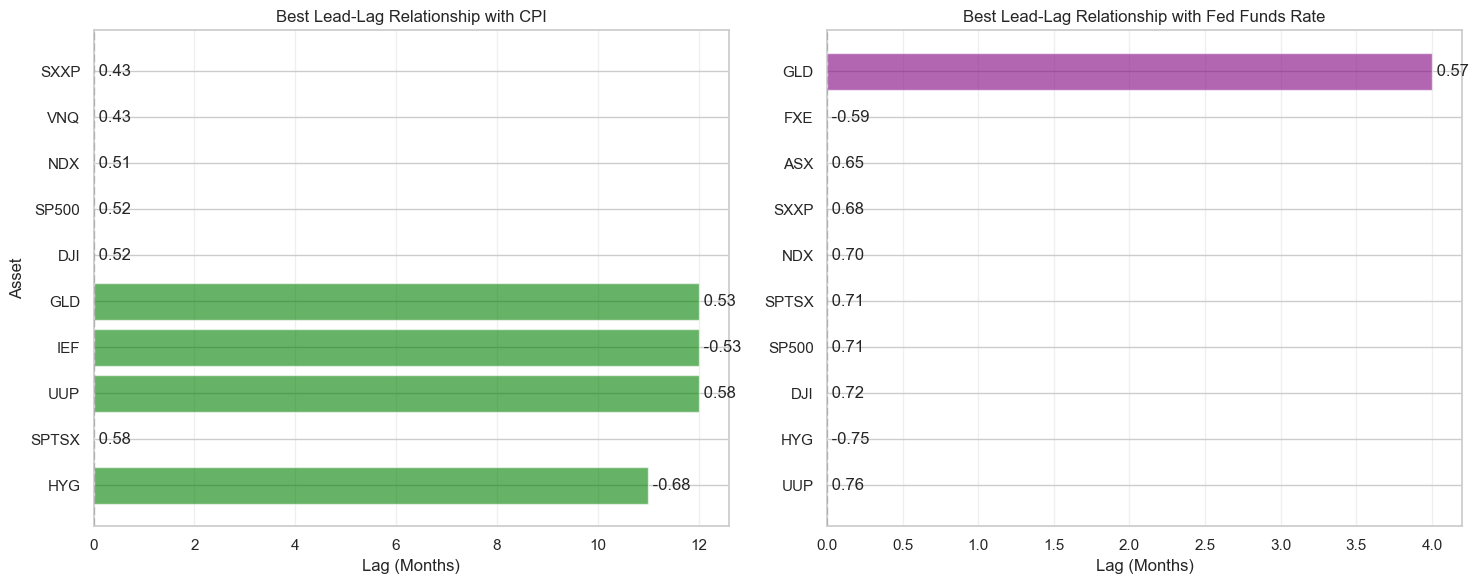


=== TOP LEAD-LAG RELATIONSHIPS ===
      Best_Lag_CPI Max_CCF_CPI Best_Lag_FDFD Max_CCF_FDFD
HYG             11   -0.675835             0    -0.749191
SPTSX            0    0.584057             0     0.706546
UUP             12    0.576315             0     0.756916
IEF             12   -0.534469             0    -0.500058
GLD             12    0.532223             4     0.574618


<Figure size 1200x500 with 0 Axes>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import ccf
from scipy import stats

# --- 1. DATA PREPARATION ---
df = pd.read_csv('HW3_Macro_Data.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()
train_data = df.loc['2010-01-01':'2024-12-31']
test_data = df.loc['2025-01-01':'2025-04-30']

# --- 2. TRAIN MACRO MODELS ---
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[['CPI', 'FDFD']])
y_train = train_data.drop(columns=['CPI', 'FDFD'])

models = {}
for asset in y_train.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[asset])
    models[asset] = model

# --- 3. OUT-OF-SAMPLE FORECASTING ---
X_test = scaler.transform(test_data[['CPI', 'FDFD']])
predictions = pd.DataFrame(index=test_data.index)
for asset, model in models.items():
    predictions[asset] = model.predict(X_test)

residuals = test_data[y_train.columns] - predictions
std_residuals = residuals / train_data[y_train.columns].std()

# --- 4. LEAD-LAG ANALYSIS (CCF) ---
lags = 12
ccf_results = pd.DataFrame(index=y_train.columns, 
                         columns=['Best_Lag_CPI', 'Max_CCF_CPI', 
                                'Best_Lag_FDFD', 'Max_CCF_FDFD'])

for asset in y_train.columns:
    # CPI CCF
    cpi_ccf = ccf(train_data[asset].dropna(), train_data['CPI'].dropna(), adjusted=True)
    best_lag_cpi = np.argmax(np.abs(cpi_ccf[:lags+1]))  # Only consider positive lags
    ccf_results.loc[asset, ['Best_Lag_CPI', 'Max_CCF_CPI']] = best_lag_cpi, cpi_ccf[best_lag_cpi]
    
    # FDFD CCF
    fdfd_ccf = ccf(train_data[asset].dropna(), train_data['FDFD'].dropna(), adjusted=True)
    best_lag_fdfd = np.argmax(np.abs(fdfd_ccf[:lags+1]))  # Only consider positive lags
    ccf_results.loc[asset, ['Best_Lag_FDFD', 'Max_CCF_FDFD']] = best_lag_fdfd, fdfd_ccf[best_lag_fdfd]

# --- 5. VISUALIZE LEAD-LAG RELATIONSHIPS ---
plt.figure(figsize=(15, 6))

# Plot best lags for CPI
plt.subplot(1, 2, 1)
sorted_assets_cpi = ccf_results.sort_values('Max_CCF_CPI', key=abs, ascending=False).index[:10]
for asset in sorted_assets_cpi:
    lag = ccf_results.loc[asset, 'Best_Lag_CPI']
    correlation = ccf_results.loc[asset, 'Max_CCF_CPI']
    plt.barh(asset, lag, color='blue' if lag < 0 else 'green', alpha=0.6)
    plt.text(lag, asset, f' {correlation:.2f}', va='center')

plt.axvline(0, color='black', linestyle='--')
plt.title('Best Lead-Lag Relationship with CPI')
plt.xlabel('Lag (Months)')
plt.ylabel('Asset')
plt.grid(axis='x', alpha=0.3)

# Plot best lags for FDFD
plt.subplot(1, 2, 2)
sorted_assets_fdfd = ccf_results.sort_values('Max_CCF_FDFD', key=abs, ascending=False).index[:10]
for asset in sorted_assets_fdfd:
    lag = ccf_results.loc[asset, 'Best_Lag_FDFD']
    correlation = ccf_results.loc[asset, 'Max_CCF_FDFD']
    plt.barh(asset, lag, color='red' if lag < 0 else 'purple', alpha=0.6)
    plt.text(lag, asset, f' {correlation:.2f}', va='center')

plt.axvline(0, color='black', linestyle='--')
plt.title('Best Lead-Lag Relationship with Fed Funds Rate')
plt.xlabel('Lag (Months)')
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# --- 6. DETAILED CCF PLOTS FOR TOP ASSET ---
top_asset = ccf_results.sort_values('Max_CCF_CPI', key=abs, ascending=False).index[0]

plt.figure(figsize=(12, 5))


# --- 7. FINAL RESULTS ---
final_results = pd.concat([
    residuals.mean().rename('Avg_Residual'),
    std_residuals.mean().rename('Std_Deviation'),
    ccf_results
], axis=1)



print("\n=== TOP LEAD-LAG RELATIONSHIPS ===")
print(ccf_results.sort_values('Max_CCF_CPI', key=abs, ascending=False).head())



## Question 7 - Why do you think certain assets may have led or lagged your macro factors over this period?

 Assets whose prices embed expectations—HYG (high-yield credit), UUP (broad U.S. dollar index), IEF (7-10 yr Treasuries), and GLD (gold)—tend to lead slow-moving macro readings such as CPI and Fed-Funds because traders continuously discount forward inflation and policy paths. By contrast, assets whose cash-flows adjust only after the macro shock—e.g., SPTSX (resource-heavy Canadian equities) or most broad equity benchmarks—behave more lagged or contemporaneous. Recognising these structural leads/lags can sharpen tactical allocation and risk-management decisions.

## Question 8 - Are your results suggestive of any trades that should be considered? If yes, what are they? If no, why not?

The correlations do hint at directionally useful trades — credit-spread shorts ahead of inflation spikes, USD+duration longs ahead of disinflation, and tactical long-gold before policy pivots — provided you confirm robustness out-of-sample, account for carry and liquidity costs, and size the trades inside a disciplined risk budget.